## Desenvolvimento Sustentável - Uma análise com dados

Neste projeto, o meu objetivo é colocar em prática o que aprendi na formação da Alura "Python para Data Science". Com isso, desejo fazer uma análise exploratória de dados (EDA) com um dataset obtido no Kaggle sobre os Objetivos de Desenvolvimento Sustentáveis (ODS).

Importando a base de dados:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dados/sdg_index_2000-2022.csv')

Ver as primeiras linhas do DataFrame:

In [3]:
df.head()

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,AFG,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,AFG,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,AFG,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,...,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,AFG,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,...,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,AFG,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,...,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2


Extrair informações sobre valores não nulos, nome das colunas e seus tipos:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_code     4140 non-null   object 
 1   country          4140 non-null   object 
 2   year             4140 non-null   int64  
 3   sdg_index_score  4140 non-null   float64
 4   goal_1_score     4140 non-null   float64
 5   goal_2_score     4140 non-null   float64
 6   goal_3_score     4140 non-null   float64
 7   goal_4_score     4140 non-null   float64
 8   goal_5_score     4140 non-null   float64
 9   goal_6_score     4140 non-null   float64
 10  goal_7_score     4140 non-null   float64
 11  goal_8_score     4140 non-null   float64
 12  goal_9_score     4140 non-null   float64
 13  goal_10_score    4140 non-null   float64
 14  goal_11_score    4140 non-null   float64
 15  goal_12_score    4140 non-null   float64
 16  goal_13_score    4140 non-null   float64
 17  goal_14_score 

Conferindo de fato se não temos valores nulos:

In [5]:
df.isna().sum().sum()

0

Conferindo se há valores duplicados:

In [6]:
df.duplicated().sum()

0

Checando os países presentes em nossas amostras:

In [7]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic',
       'East and South Asia', 'Eastern Europe and Central Asia',
       'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'High-income

Selecionando as amostras que queremos remover do DataFrame:

In [8]:
amostras_del = (df['country'] == "East and South Asia") | (df['country'] == "Eastern Europe and Central Asia") | \
(df['country'] == "High-income Countries") | (df['country'] == "Latin America and the Caribbean") | \
(df['country'] == "Lower & Lower-middle Income") | (df['country'] == "Lower-middle-income Countries") | \
(df['country'] == "Low-income Countries") | (df['country'] == "Middle East and North Africa") | \
(df['country'] == "Oceania") | (df['country'] == "OECD members") | (df['country'] == "Small Island Developing States") | \
(df['country'] == "Sub-Saharan Africa") | (df['country'] == "Upper-middle-income Countries") | \
(df['country'] == "World")

Filtrando o nosso dataset somente com as amostras desejadas:

In [9]:
df = df.loc[~amostras_del]

In [10]:
df.describe()

,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,2011.000000,63.850288,64.795233,57.698900,64.306207,72.073808,55.950367,64.523965,57.614013,69.838554,36.964222,52.771163,70.211498,79.268675,81.513332,47.805998,65.104453,62.587166,55.583552
std,6.634118,10.916160,36.836088,11.221834,22.651757,27.008855,17.621801,15.103414,21.871602,10.243085,26.079512,32.127442,18.417139,17.017656,21.895557,28.637462,13.775995,14.843730,13.277460
min,2000.000000,36.000000,0.000000,7.700000,5.900000,0.000000,3.500000,23.300000,0.100000,38.400000,0.000000,0.000000,13.800000,32.900000,0.000000,0.000000,26.000000,27.900000,15.100000
25%,2005.000000,55.100000,30.825000,52.325000,44.900000,55.600000,43.100000,52.600000,41.200000,63.900000,15.400000,23.200000,56.400000,67.825000,71.700000,36.925000,55.100000,51.600000,45.900000
50%,2011.000000,65.400000,81.600000,58.900000,71.150000,81.200000,57.700000,64.900000,65.200000,70.100000,29.000000,57.400000,75.300000,84.500000,90.800000,58.700000,65.100000,61.700000,55.100000
75%,2017.000000,72.300000,98.600000,65.300000,81.700000,94.900000,69.200000,74.700000,72.100000,76.700000,52.700000,80.800000,85.075000,94.100000,97.300000,67.900000,74.300000,74.200000,65.000000
max,2022.000000,86.800000,100.000000,83.400000,97.300000,100.000000,94.000000,95.100000,99.600000,93.600000,99.200000,100.000000,99.900000,99.000000,99.900000,91.200000,97.900000,96.000000,100.000000


**1. Quais são os países mais sustentáveis do mundo ?**

Fazendo uma seleção de 10 países com o maior score médio de Desenvolvimento Sustentável do mundo entre 2000 e 2022:

In [11]:
melhores_scores = round(df.groupby(['country'])['sdg_index_score'].mean().sort_values(ascending=False).head(10),2)
melhores_scores

country
Sweden            85.06
Finland           84.73
Denmark           83.43
Austria           80.71
Norway            80.66
Germany           80.07
United Kingdom    79.16
Switzerland       78.93
France            78.39
Czechia           78.10
Name: sdg_index_score, dtype: float64

Respondendo a primeira pergunta com um gráfico:

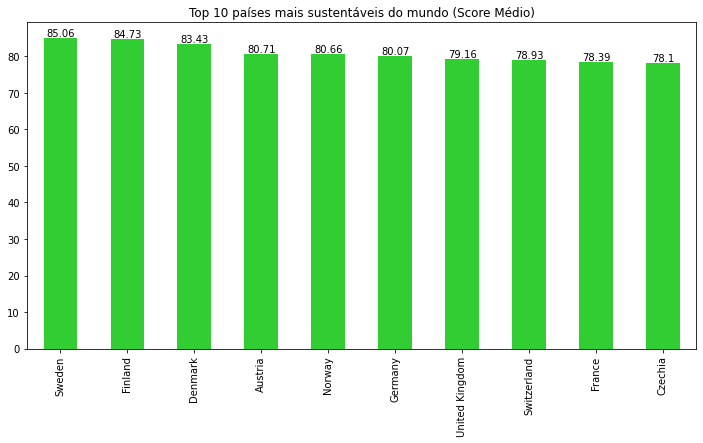

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
fig = melhores_scores.plot(kind='bar',color='limegreen',xlabel='')
fig.set_title('Top 10 países mais sustentáveis do mundo (Score Médio)')
fig.bar_label(fig.containers[0], label_type='edge')
plt.savefig('dados/paises_mais_sustentaveis.png')